In [1939]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
from sklearn.metrics import accuracy_score,plot_roc_curve
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Inayat\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [1867]:
ds = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [1868]:
ds.shape

(1599, 12)

In [1869]:
ds.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [1870]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1871]:
ds.columns = ds.columns.str.replace(' ', '_')
ds.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [1872]:
ds.isnull().sum()     #no Missing Values

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1873]:
ds.duplicated().sum()

240

In [1874]:
#dropping duplicate rows and resetting index
ds.drop_duplicates(inplace=True)
ds.reset_index(drop=True, inplace=True)
print('Number of rows after removing duplicates=', len(ds))

Number of rows after removing duplicates= 1359


<AxesSubplot:>

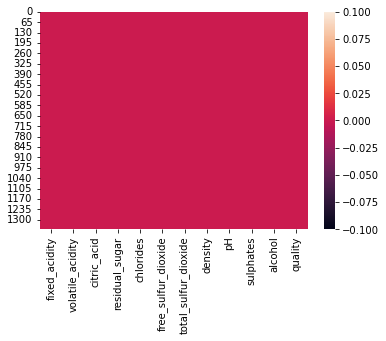

In [1875]:
sns.heatmap(ds.isnull())

In [1876]:
ds.duplicated().sum()

0

<AxesSubplot:xlabel='fixed_acidity', ylabel='Density'>

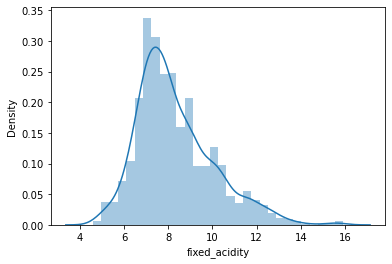

In [1877]:
 sns.distplot(ds['fixed_acidity'])

<AxesSubplot:xlabel='volatile_acidity', ylabel='Density'>

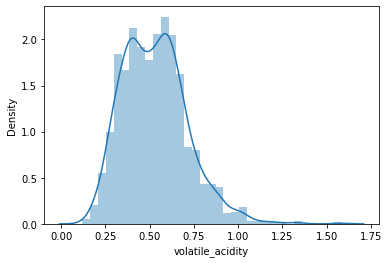

In [1878]:
 sns.distplot(ds['volatile_acidity'])

<AxesSubplot:xlabel='citric_acid', ylabel='Density'>

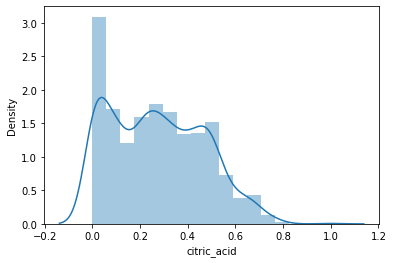

In [1879]:
 sns.distplot(ds['citric_acid'])

In [1880]:
ds.quality.value_counts(sort=False)

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

[Text(0.5, 1.0, 'HISTOGRAM OF WINE QUALITY'),
 Text(0.5, 0, 'quality'),
 Text(0, 0.5, 'count')]

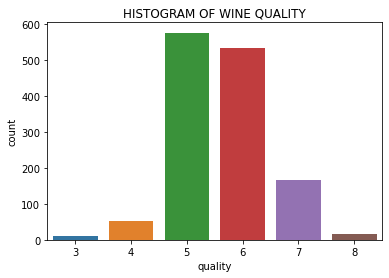

In [1881]:
plt = sns.countplot(x='quality',data=ds)
plt.set(title='HISTOGRAM OF WINE QUALITY',xlabel='quality',ylabel='count')

<AxesSubplot:xlabel='quality', ylabel='fixed_acidity'>

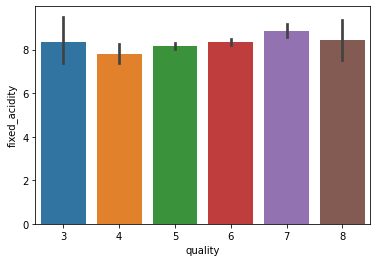

In [1882]:
sns.barplot(x='quality',y='fixed_acidity',data=ds)
#fixed_acidity doesnot have impact on quality of wine

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

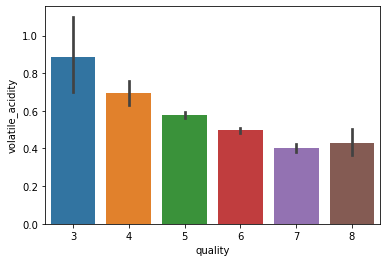

In [1883]:
sns.barplot(x='quality',y='volatile_acidity',data=ds)
#Volatile acidity has negative relation with quality.

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

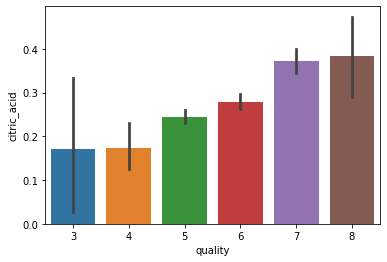

In [1884]:
sns.barplot(x='quality',y='citric_acid',data=ds)
#citric acid has positive relation with quality.

<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

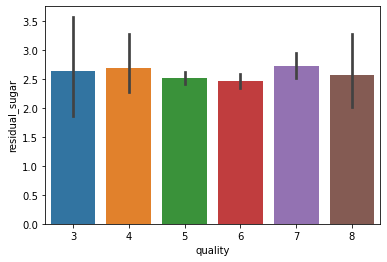

In [1885]:
sns.barplot(x='quality',y='residual_sugar',data=ds)
#Residual sugar have no impact on the quality of wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

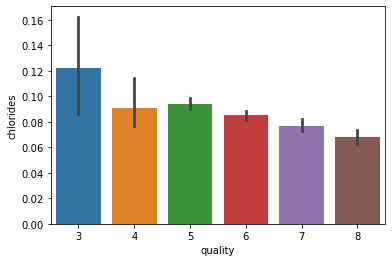

In [1886]:
sns.barplot(x='quality',y='chlorides',data=ds)
#Increase in chlorides will decrease the quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='free_sulfur_dioxide'>

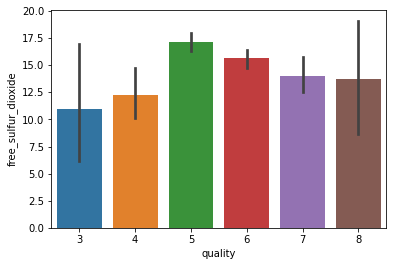

In [1887]:
sns.barplot(x='quality',y='free_sulfur_dioxide',data=ds)
#free sulphur dioxide has positive relation with the quality.

<AxesSubplot:xlabel='quality', ylabel='total_sulfur_dioxide'>

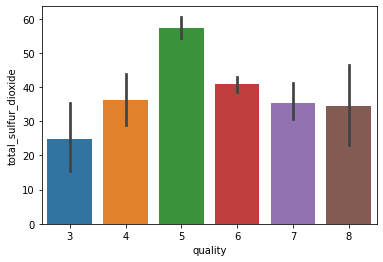

In [1888]:
sns.barplot(x='quality',y='total_sulfur_dioxide',data=ds)
#total sulphur dioxide has positive relation with the quality.

<AxesSubplot:xlabel='quality', ylabel='density'>

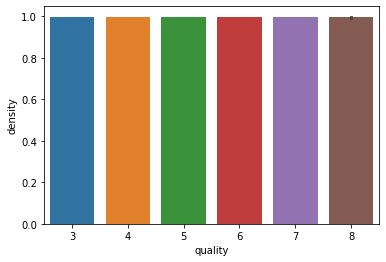

In [1889]:
sns.barplot(x='quality',y='density',data=ds)
#Density has no corelation with quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

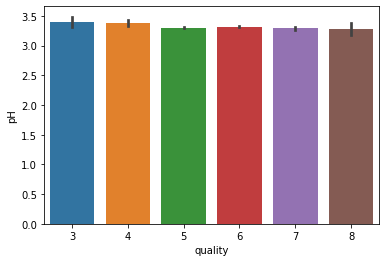

In [1890]:
sns.barplot(x='quality',y='pH',data=ds)
#PH no corealtion with quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

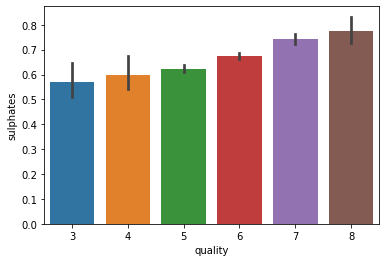

In [1891]:
sns.barplot(x='quality',y='sulphates',data=ds)
#sulphate increases quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

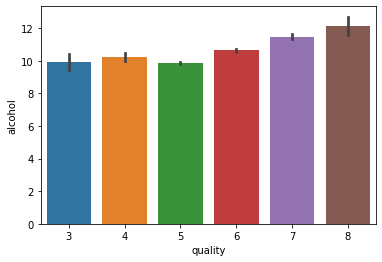

In [1892]:
sns.barplot(x='quality',y='alcohol',data=ds)
#ncrease in alcohol quality will improve.

In [1893]:
ds_quality = {3:'bad', 4:'bad',5:'bad',6:'bad',7:'good',8:'good'}
ds['quality2'] = ds.quality.map(ds_quality)
ds

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,bad
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,bad
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,bad
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


In [1894]:
le = LabelEncoder()
ds['quality2']=le.fit_transform(ds['quality2'])
ds

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


[Text(0.5, 1.0, 'HISTOGRAM OF WINE QUALITY'),
 Text(0.5, 0, 'quality'),
 Text(0, 0.5, 'count')]

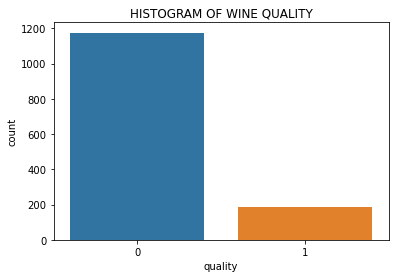

In [1895]:
plt = sns.countplot(x='quality2',data=ds)
plt.set(title='HISTOGRAM OF WINE QUALITY',xlabel='quality',ylabel='count')

<AxesSubplot:>

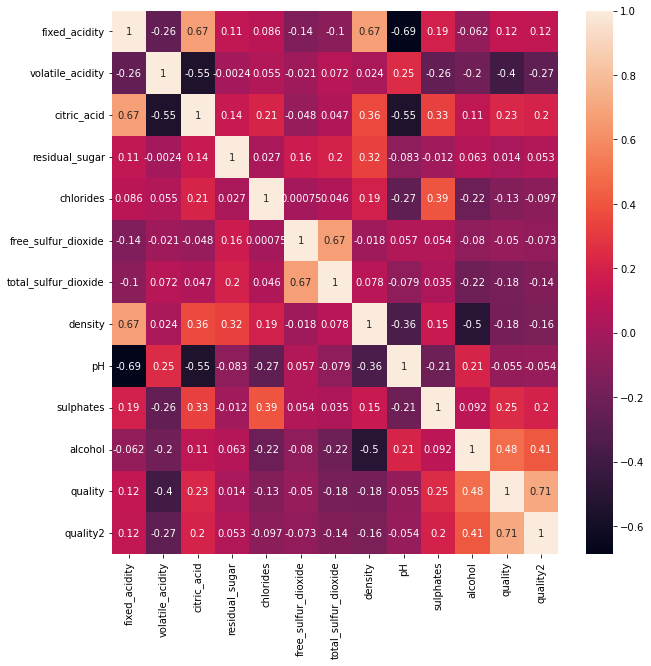

In [1896]:
from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(ds.corr(),color ='k',annot=True)

In [1897]:
ds.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
fixed_acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024,0.116120
volatile_acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214,-0.267344
citric_acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057,0.203561
residual_sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640,0.052811
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988,-0.096806
free_sulfur_dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463,-0.072771
total_sulfur_dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855,-0.135877
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252,-0.158052
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245,-0.054131
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835,0.201551


In [1898]:
x = ds.drop (['quality'], axis = 1)

In [1899]:
x['quality2'].value_counts()

0    1175
1     184
Name: quality2, dtype: int64

In [1900]:
x.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality2'],
      dtype='object')

In [1901]:
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [1902]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([1146,  176], dtype=int64))

In [1903]:
x.skew()

fixed_acidity           0.941041
volatile_acidity        0.729279
citric_acid             0.312726
residual_sugar          4.548153
chlorides               5.502487
free_sulfur_dioxide     1.226579
total_sulfur_dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality2                2.133662
dtype: float64

In [1904]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [1905]:
#creating new dataset after removing skewness and saving it to 'x'
x = pd.DataFrame(x_new , columns = x.columns)
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality2
0,-0.439412,0.978091,-1.530544,-0.602600,-0.166676,-0.269573,-0.128948,0.587781,1.277041,-0.582775,-1.068157,-0.395722
1,-0.161475,1.720040,-1.530544,0.560720,0.778512,0.992495,0.841796,0.054350,-0.695907,0.400130,-0.499290,-0.395722
2,-0.161475,1.242047,-1.256962,0.153076,0.557116,0.192377,0.530012,0.161294,-0.296058,0.188379,-0.499290,-0.395722
3,1.529010,-1.551503,1.389613,-0.602600,-0.219369,0.384096,0.681966,0.694083,-0.967619,-0.391438,-0.499290,-0.395722
4,-0.439412,0.791661,-1.530544,-0.844564,-0.219369,-0.023152,0.100926,0.587781,1.277041,-0.582775,-1.068157,-0.395722
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,-0.903672,0.596149,-0.996743,-0.602600,-0.616834,1.176074,0.028175,-0.100946,0.727244,1.169880,-0.916248,-0.395722
1355,-1.436385,0.494776,-0.996743,-0.384706,0.477791,1.395040,0.236575,-0.968055,0.912498,-0.391438,0.286561,-0.395722
1356,-1.733557,0.230050,-0.871292,-0.009276,-1.001198,1.724577,0.447853,-0.849072,1.337040,0.878488,0.875408,-0.395722
1357,-1.733557,0.719444,-0.748774,-0.384706,-0.219369,1.395040,0.236575,-0.660104,1.633860,0.593171,-0.021928,-0.395722


In [1906]:
len(x)

1359

In [1907]:
x.skew()

fixed_acidity           0.001884
volatile_acidity        0.008311
citric_acid             0.016563
residual_sugar         -0.001715
chlorides              -0.061923
free_sulfur_dioxide    -0.009899
total_sulfur_dioxide   -0.003897
density                -0.002812
pH                     -0.005007
sulphates               0.014637
alcohol                 0.116742
quality2                2.133662
dtype: float64

In [1908]:
#to check if skweness is lying between -0.5 to 0.5
x.skew()[np.abs(x.skew()) < 0.5].all()

True

fixed_acidity              AxesSubplot(0.125,0.125;0.0545775x0.755)
volatile_acidity        AxesSubplot(0.190493,0.125;0.0545775x0.755)
citric_acid             AxesSubplot(0.255986,0.125;0.0545775x0.755)
residual_sugar          AxesSubplot(0.321479,0.125;0.0545775x0.755)
chlorides               AxesSubplot(0.386972,0.125;0.0545775x0.755)
free_sulfur_dioxide     AxesSubplot(0.452465,0.125;0.0545775x0.755)
total_sulfur_dioxide    AxesSubplot(0.517958,0.125;0.0545775x0.755)
density                 AxesSubplot(0.583451,0.125;0.0545775x0.755)
pH                      AxesSubplot(0.648944,0.125;0.0545775x0.755)
sulphates               AxesSubplot(0.714437,0.125;0.0545775x0.755)
alcohol                  AxesSubplot(0.77993,0.125;0.0545775x0.755)
quality2                AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

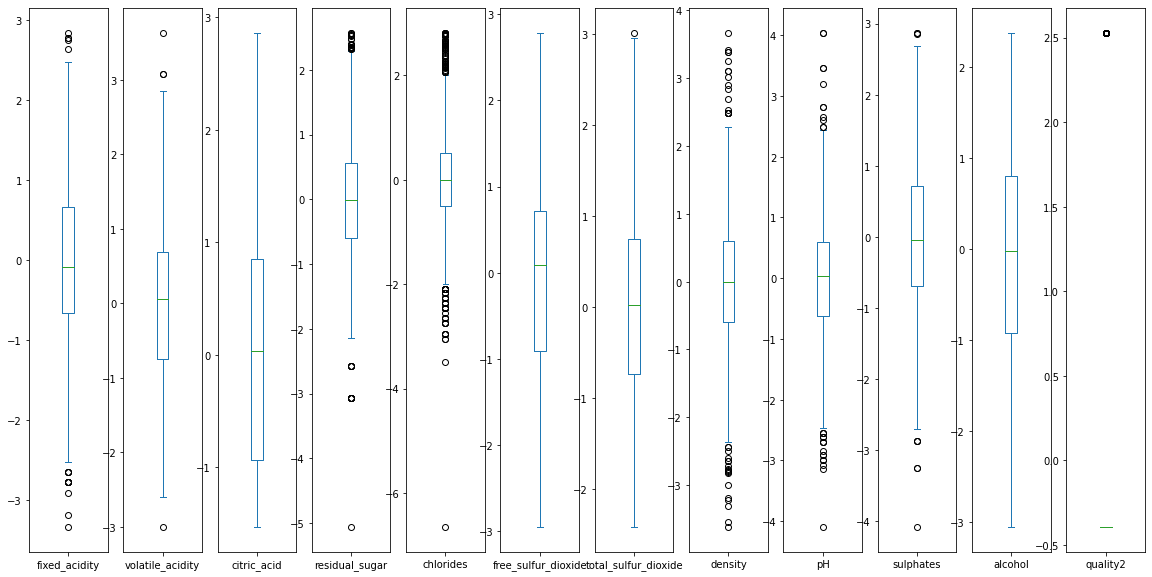

In [1909]:
# to find out outliers in the dataset
x.plot(kind='box',subplots=True,figsize=(20,10))

In [1910]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(x)) < 3).all()

fixed_acidity           False
volatile_acidity        False
citric_acid              True
residual_sugar          False
chlorides               False
free_sulfur_dioxide      True
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality2                 True
dtype: bool

In [1911]:
#to remove outliers in data set through zscore
z = np.abs(zscore(x))
z.shape

(1359, 12)

In [1912]:
threshold = 3
print(np.where(z>3))

(array([   6,   41,   41,   87,   87,  114,  115,  135,  151,  175,  385,
        410,  420,  450,  473,  473,  483,  485,  528,  534,  602,  602,
        689,  722,  722,  764,  779,  810,  866,  866,  920,  948, 1081,
       1082, 1097, 1106, 1121, 1121, 1125, 1125, 1161, 1165, 1216, 1250,
       1333], dtype=int64), array([ 3,  0,  8,  0,  8,  1,  1,  8,  9,  3,  7,  3,  7, 10,  8, 10,  7,
        7,  7,  8,  4,  8,  4,  4,  7,  7,  3,  1,  3,  7,  6,  7,  7,  7,
        9,  1,  3,  8,  3,  8,  9,  3,  7,  7,  4], dtype=int64))


In [1913]:
x_new=x[(z<3).all(axis=1)]
print(x.shape)
print(x_new.shape)

(1359, 12)
(1322, 12)


In [1914]:
#to find % loss in data
loss = (1359-1322)/1359 * 100
print(loss)

2.7225901398086827


fixed_acidity              AxesSubplot(0.125,0.125;0.0545775x0.755)
volatile_acidity        AxesSubplot(0.190493,0.125;0.0545775x0.755)
citric_acid             AxesSubplot(0.255986,0.125;0.0545775x0.755)
residual_sugar          AxesSubplot(0.321479,0.125;0.0545775x0.755)
chlorides               AxesSubplot(0.386972,0.125;0.0545775x0.755)
free_sulfur_dioxide     AxesSubplot(0.452465,0.125;0.0545775x0.755)
total_sulfur_dioxide    AxesSubplot(0.517958,0.125;0.0545775x0.755)
density                 AxesSubplot(0.583451,0.125;0.0545775x0.755)
pH                      AxesSubplot(0.648944,0.125;0.0545775x0.755)
sulphates               AxesSubplot(0.714437,0.125;0.0545775x0.755)
alcohol                  AxesSubplot(0.77993,0.125;0.0545775x0.755)
quality2                AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

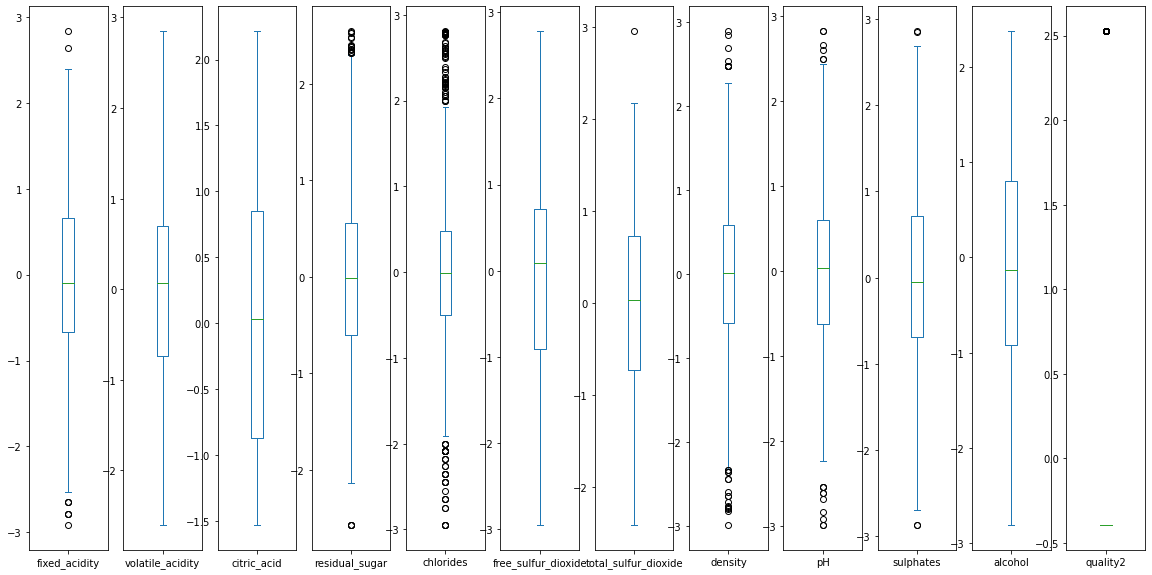

In [1915]:
# visualization for outliers after using zscore
x_new.plot(kind='box',subplots=True,figsize=(20,10))

In [1916]:
#seperate feature variable and target variable
x = x_new.drop(['quality2'], axis = 1)
y = x_new['quality2']

In [1917]:
x.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [1918]:
y

0      -0.395722
1      -0.395722
2      -0.395722
3      -0.395722
4      -0.395722
          ...   
1354   -0.395722
1355   -0.395722
1356   -0.395722
1357   -0.395722
1358   -0.395722
Name: quality2, Length: 1322, dtype: float64

In [1919]:
le = LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1920]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=587)

In [1921]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (1057, 11)
shape of y_train: (1057, 11)
shape of x_test: (265, 11)
shape of y_test: (265,)


In [1922]:
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
839,-0.439412,0.390870,-1.530544,-0.384706,-0.868269,-0.905704,-1.661629,-0.579240,0.912498,-0.391438,0.947024
669,-0.095482,-0.675978,0.239484,-0.844564,2.054390,-2.374824,0.268647,0.305463,0.030288,1.523823,-0.916248
626,-0.663870,-1.317784,0.239484,-0.009276,-1.665067,1.590514,1.780652,-0.106306,-2.540798,2.684722,-0.916248
243,0.498497,-0.675978,0.338239,2.051267,0.353249,-0.407547,0.330796,1.276463,0.477067,0.930648,0.286561
894,0.707082,-0.052085,0.530028,-0.844564,0.221692,-1.111441,-1.085658,0.182667,-0.230297,0.930648,0.559217
...,...,...,...,...,...,...,...,...,...,...,...
138,-0.663870,-0.479769,0.804351,2.031949,-0.440160,1.176074,1.792292,0.321467,0.727244,0.593171,0.286561
119,-2.054720,-0.052085,-0.933643,0.153076,-1.998214,0.384096,1.412557,-1.619838,1.983215,0.035740,1.834094
50,-0.297559,0.005817,-0.570240,0.779943,1.155452,1.445900,0.966489,-0.643926,-0.899298,0.035740,-0.021928
641,0.155779,1.242047,0.189362,1.668920,-0.219369,-0.141937,-1.167189,-0.106306,0.912498,0.400130,1.082270


In [1923]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1], dtype=int64)

In [1924]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1330,-0.742020,0.284335,-0.688578,-1.416094,-0.114946,0.992495,0.170291,-0.218938,0.223185,-0.300383,-1.393590
419,0.756987,0.909203,-0.809674,0.674829,-0.114946,-1.111441,-0.258757,0.906303,-0.763443,0.530778,-0.133704
225,-1.072895,0.955262,-1.530544,-0.187799,-0.219369,-0.141937,0.582389,0.054350,1.156398,0.331728,-1.393590
170,-0.903672,0.645915,-0.748774,1.492910,0.813129,0.290869,1.768924,0.107838,-0.164783,-0.126916,-0.916248
1314,-0.742020,0.337937,-1.392008,-0.384706,-0.383420,0.384096,-0.504110,-0.509217,0.350595,-0.126916,-0.021928
...,...,...,...,...,...,...,...,...,...,...,...
239,1.414870,-0.880665,1.467636,1.586258,-0.440160,0.384096,0.797833,1.408286,-0.561607,0.981303,-0.133704
206,-0.030800,-0.811460,-1.125255,-0.844564,-0.064161,-0.141937,0.390467,-0.240407,0.413948,-1.005955,-0.372117
480,0.756987,-0.479769,-0.069057,0.779943,0.557116,0.087966,0.268647,0.694083,-0.763443,0.712437,-0.250347
878,0.032612,1.488820,-1.530544,1.628820,0.670825,-1.346667,-1.345336,0.980460,0.350595,-0.894752,-0.771033


In [1925]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1926]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=587)

In [1927]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
RF = RandomForestClassifier(random_state=0)

model=[lg,gnb,svc,dtc,knn,RF]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score: LogisticRegression() is
[[229   9]
 [  9  18]]
0.9320754716981132
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       238
           1       0.67      0.67      0.67        27

    accuracy                           0.93       265
   macro avg       0.81      0.81      0.81       265
weighted avg       0.93      0.93      0.93       265



Accuracy_score: GaussianNB() is
[[211  27]
 [  6  21]]
0.8754716981132076
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       238
           1       0.44      0.78      0.56        27

    accuracy                           0.88       265
   macro avg       0.70      0.83      0.74       265
weighted avg       0.92      0.88      0.89       265



Accuracy_score: SVC() is
[[232   6]
 [ 13  14]]
0.9283018867924528
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       238
          

In [1928]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean())
print('cross validation score of desicion tree model = ', cross_val_score(dtc,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean())

cross validation score of random forest model =  0.8721726700971985
cross validation score of logistic regression model =  0.8759519725557462
cross validation score of desicion tree model =  0.8169153802172671
cross validation score of standard vector machine model =  0.8729331046312179
cross validation score of GaussianNB model =  0.8366037735849057


Hyper parameter tuning

In [1929]:
#parameters of LogisticRegression
parameter= { 'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']}

In [1930]:
gcv = GridSearchCV(LogisticRegression(random_state=587), parameter, verbose=1, cv=10, n_jobs=-1)

In [1931]:
#training the model
gcv.fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=587), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_iter': [20, 50, 100, 200, 500, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [1932]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'class_weight': 'balanced', 'max_iter': 20, 'solver': 'newton-cg'}

In [1933]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [1934]:
# finding best estimator
gcv.best_estimator_

LogisticRegression(class_weight='balanced', max_iter=20, random_state=587,
                   solver='newton-cg')

In [1935]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

80.75471698113208


In [1938]:
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

NameError: name 'plot_roc_curve' is not defined

In [ ]:
saving the model
import joblib
joblib.dump(final_model,'FinalModel_wine_quality.pkl')